In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving glassdoor_jobs.csv to glassdoor_jobs.csv


In [ ]:
df = pd.read_csv('glassdoor_jobs.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
df['hourly']= df['Salary Estimate'].apply(lambda x:1 if 'per hour' in x.lower() else 0)

In [ ]:
df[df['hourly']==1]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly
197,197,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1
209,209,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1
240,240,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1
247,247,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1
257,257,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1
307,307,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1
337,337,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1
427,427,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1
437,437,Clinical Laboratory Scientist,$24-$39 Per Hour(Glassdoor est.),POSITION PURPOSE:\nPerforms CLIA moderate and ...,3.7,Vail Health\n3.7,"Vail, CO","Vail, CO",501 to 1000 employees,1966,Hospital,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1
456,456,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1


In [ ]:
df['employer_provided'] = df['Salary Estimate'].apply(lambda x:1 if 'employer provided salary:' in x.lower() else 0 )

In [ ]:
df[df['employer_provided']==1]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
48,48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,1
161,161,Data Engineer,Employer Provided Salary:$120K-$145K,"Location: Tampa, FL\nTitle: Data Engineer\nTS/...",5.0,Gridiron IT\n5.0,"Tampa, FL","Reston, VA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,0,1
208,208,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,0,1
331,331,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,0,1
377,377,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,-1,0,1
464,464,ENVIRONMENTAL ENGINEER/SCIENTIST,Employer Provided Salary:$25-$28 Per Hour,"McPhail Associates, LLC is a geotechnical and ...",3.3,Mcphail Associates\n3.3,"Cambridge, MA","Cambridge, MA",1 to 50 employees,1976,Company - Private,Construction,"Construction, Repair & Maintenance",Unknown / Non-Applicable,-1,1,1
472,472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1
477,477,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,1
518,518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1
694,694,ENVIRONMENTAL ENGINEER/SCIENTIST,Employer Provided Salary:$25-$28 Per Hour,"McPhail Associates, LLC is a geotechnical and ...",3.3,Mcphail Associates\n3.3,"Cambridge, MA","Cambridge, MA",1 to 50 employees,1976,Company - Private,Construction,"Construction, Repair & Maintenance",Unknown / Non-Applicable,-1,1,1


In [ ]:
df[df['hourly']==1]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
197,197,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1,0
209,209,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0
240,240,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,0
247,247,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0
257,257,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1,0
307,307,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1,0
337,337,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0
427,427,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,0
437,437,Clinical Laboratory Scientist,$24-$39 Per Hour(Glassdoor est.),POSITION PURPOSE:\nPerforms CLIA moderate and ...,3.7,Vail Health\n3.7,"Vail, CO","Vail, CO",501 to 1000 employees,1966,Hospital,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0
456,456,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0


In [ ]:
df= df[df['Salary Estimate']!= '-1']

In [ ]:
df.shape

(742, 17)

In [ ]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [ ]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [ ]:
minus_kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [ ]:
minus_kd

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [ ]:
min_hr = minus_kd.apply(lambda x:x.lower().replace('per hour','').replace('employer provided salary:',''))

In [ ]:
min_hr

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [ ]:
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))


In [ ]:
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
950    58
951    72
952    56
953    95
955    61
Name: min_salary, Length: 742, dtype: int64

In [ ]:
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))


In [ ]:
df['max_salary']

0       91
1      112
2       90
3       97
4      143
      ... 
950    111
951    133
952     91
953    160
955    126
Name: max_salary, Length: 742, dtype: int64

In [ ]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [ ]:
df['avg_salary']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
950     84.5
951    102.5
952     73.5
953    127.5
955     93.5
Name: avg_salary, Length: 742, dtype: float64

# Company name text only

In [ ]:
df['company_txt']=df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3],axis = 1)

In [ ]:
df['company_txt']

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
950                                      GSK\n
951                               Eventbrite\n
952           Software Engineering Institute\n
953                             Numeric, LLC\n
955             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

# state field

In [ ]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

In [ ]:
df['job_state']

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
950     MA
951     TN
952     PA
953     PA
955     OH
Name: job_state, Length: 742, dtype: object

In [ ]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 IN              10
 UT              10
 WI              10
 MO               9
 AZ               9
 AL               8
 GA               6
 MI               6
 KY               6
 DE               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 NM               3
 KS               3
 MN               2
 ID               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

In [ ]:
df['same_state']= df.apply(lambda x:1 if x.Location == x.Headquarters else 0, axis = 1)

In [ ]:
df[df['same_state']==1]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne\n,TX,1
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5,ClearOne Advantage\n,MD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,944,IT - Data Engineer II,$61K-$119K (Glassdoor est.),IT - Data Engineer II\n\nThe Data Engineer II ...,3.4,Arbella Insurance\n3.4,"Quincy, MA","Quincy, MA",1001 to 5000 employees,1988,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),-1,0,0,61,119,90.0,Arbella Insurance\n,MA,1
945,945,Machine Learning Engineer (NLP),$80K-$142K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.1,CK-12 Foundation\n4.1,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2007,Company - Private,K-12 Education,Education,Unknown / Non-Applicable,-1,0,0,80,142,111.0,CK-12 Foundation\n,CA,1
946,946,Senior Data Analyst,$99K-$178K (Glassdoor est.),Senior Data Analyst\n\nAbout us\n\n\nLife360 b...,3.9,Life360\n3.9,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,0,0,99,178,138.5,Life360\n,CA,1
948,948,Data Engineer,$62K-$113K (Glassdoor est.),Do you find data architecture exciting? Does b...,3.9,Fivestars\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2011,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Belly, SpotOn",0,0,62,113,87.5,Fivestars\n,CA,1


# age of company

In [ ]:
df['age']= df.Founded.apply(lambda x:x if x < 1 else 2021-x)

# Parsing the job description

In [ ]:
df['python_skill']= df['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)

In [ ]:
df['sql_skill']= df['Job Description'].apply(lambda x:1 if 'sql' in x.lower() else 0)

In [ ]:
df[df['sql_skill']==1]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_skill,sql_skill
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,11,1,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,23,1,1
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne\n,TX,1,21,1,1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0,Logic20/20\n,CA,0,16,1,1
11,11,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,0,0,64,106,85.0,ManTech\n,VA,0,53,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,940,Revenue Analytics Manager,$45K-$78K (Glassdoor est.),HOVER uses patented technology making it possi...,4.8,HOVER\n4.8,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2011,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),-1,0,0,45,78,61.5,HOVER\n,CA,1,10,0,1
944,944,IT - Data Engineer II,$61K-$119K (Glassdoor est.),IT - Data Engineer II\n\nThe Data Engineer II ...,3.4,Arbella Insurance\n3.4,"Quincy, MA","Quincy, MA",1001 to 5000 employees,1988,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),-1,0,0,61,119,90.0,Arbella Insurance\n,MA,1,33,0,1
946,946,Senior Data Analyst,$99K-$178K (Glassdoor est.),Senior Data Analyst\n\nAbout us\n\n\nLife360 b...,3.9,Life360\n3.9,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,0,0,99,178,138.5,Life360\n,CA,1,13,1,1
948,948,Data Engineer,$62K-$113K (Glassdoor est.),Do you find data architecture exciting? Does b...,3.9,Fivestars\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2011,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Belly, SpotOn",0,0,62,113,87.5,Fivestars\n,CA,1,10,1,1


In [ ]:
#r studio 
df['R_skill'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R_skill.value_counts()

#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

#excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [ ]:
df.R_skill.value_counts()

0    740
1      2
Name: R_skill, dtype: int64

In [ ]:
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

In [ ]:
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel'],
      dtype='object')

In [ ]:
df_eda = df.drop(['Unnamed: 0'],axis =1)

In [ ]:
df_eda

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_skill,sql_skill,R_skill,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,48,1,0,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,11,1,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,56,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,23,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK\n,MA,0,191,0,0,0,0,1,0
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite\n,TN,0,15,1,1,0,1,1,0
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute\n,PA,1,37,0,0,0,0,0,1
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC\n",PA,0,-1,0,0,0,0,0,1


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_eda.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_skill,sql_skill,R_skill,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,48,1,0,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,11,1,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,56,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,23,1,1,0,0,0,1


In [ ]:
df_eda.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel'],
      dtype='object')

In [ ]:
def simplify_title(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'machine learning' in title.lower():
    return 'machine learning'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'na'


def seniority(title):
  if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
    return 'senior'
  elif 'jr' in title.lower() or 'jr.' in title.lower():
    return 'jr'
  else:
    return 'na'

In [ ]:
df_eda['job_simple']= df_eda['Job Title'].apply(simplify_title)

In [ ]:
df_eda.job_simple.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
machine learning     22
manager              22
director             14
Name: job_simple, dtype: int64

In [ ]:
df_eda['seniority'] = df_eda['Job Title'].apply(seniority)

In [ ]:
df_eda.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

# Fixing state Los Angeles as this is a city

In [ ]:
df_eda['job_state'] = df_eda.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df_eda.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
UT     10
WI     10
AZ      9
MO      9
AL      8
KY      6
GA      6
DE      6
MI      6
IA      5
CT      5
LA      4
OR      4
NE      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

# Job description length


In [ ]:
df_eda['jd_len'] = df_eda['Job Description'].apply(lambda x: len(x))
df_eda['jd_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: jd_len, Length: 742, dtype: int64

# Competitor count

In [ ]:
df_eda['num_competitors'] = df_eda['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [ ]:
df_eda['num_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: num_competitors, Length: 742, dtype: int64

# Converting hourly wage to annual

In [ ]:
df_eda['min_salary'] = df_eda.apply(lambda x: x.min_salary*3 if x.hourly ==1 else x.min_salary, axis =1)
df_eda['max_salary'] = df_eda.apply(lambda x: x.max_salary*3 if x.hourly ==1 else x.max_salary, axis =1)

In [ ]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,17,24
209,1,21,34
240,1,18,25
247,1,21,34
257,1,15,25
307,1,17,24
337,1,21,34
427,1,18,25
437,1,24,39
456,1,21,34


In [ ]:
df_eda['company_txt'] = df_eda.company_txt.apply(lambda x: x.replace('\n', ''))

In [ ]:
df_eda['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [ ]:
df_eda.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_skill,sql_skill,R_skill,spark,aws,excel,jd_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,75.370620,129.115903,100.626011,0.557951,47.524259,0.528302,0.512129,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.504332,44.140923,38.855948,0.496965,53.839080,0.499535,0.500190,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,97.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,71.000000,124.000000,97.500000,1.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [ ]:
df_eda.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'jd_len', 'num_competitors'],
      dtype='object')

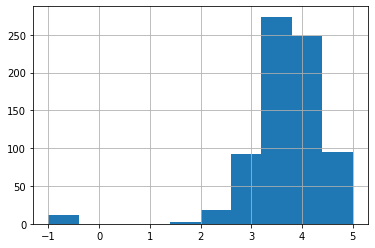

In [ ]:
df_eda.Rating.hist()

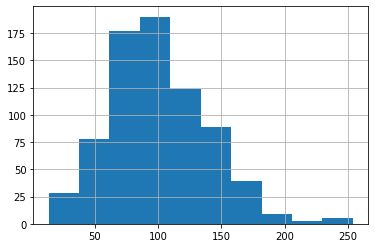

In [ ]:
df.avg_salary.hist()

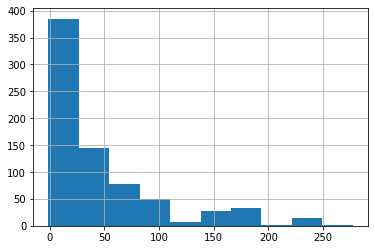

In [ ]:
df_eda.age.hist()

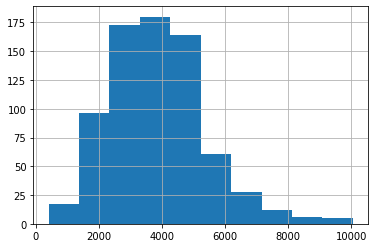

In [ ]:
df_eda.jd_len.hist()

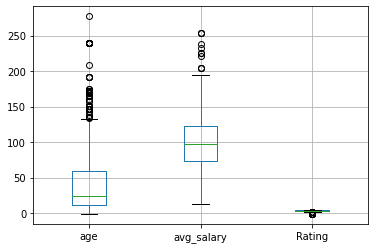

In [ ]:
df_eda.boxplot(column = ['age','avg_salary','Rating'])

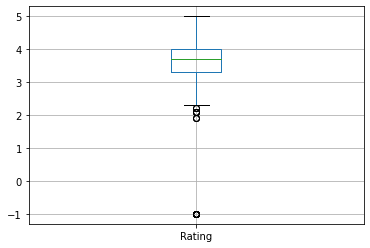

In [ ]:
df_eda.boxplot(column = 'Rating')

In [ ]:
df_eda[['age','avg_salary','Rating','jd_len']].corr()

,age,avg_salary,Rating,jd_len
age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
jd_len,0.164188,0.078808,-0.012281,1.000000


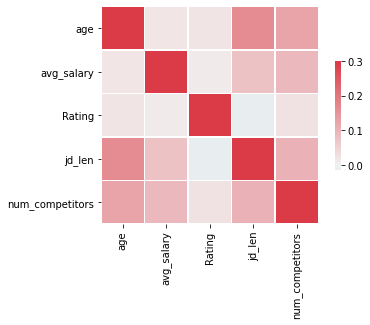

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_eda[['age','avg_salary','Rating','jd_len','num_competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_eda.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'jd_len', 'num_competitors'],
      dtype='object')

In [ ]:
df_cat = df_eda[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state','python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel','job_simple','seniority']]

graph for Location: total = 200


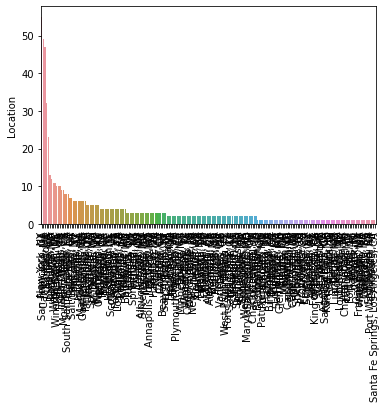

graph for Headquarters: total = 198


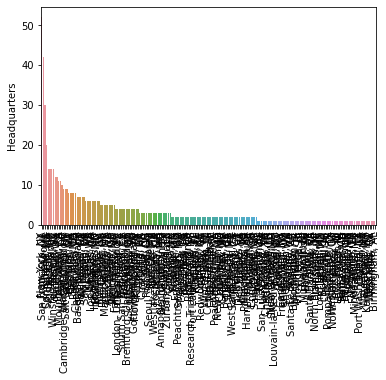

graph for Size: total = 9


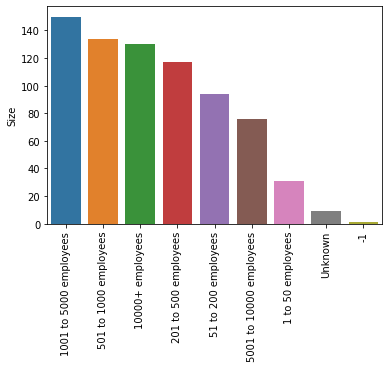

graph for Type of ownership: total = 11


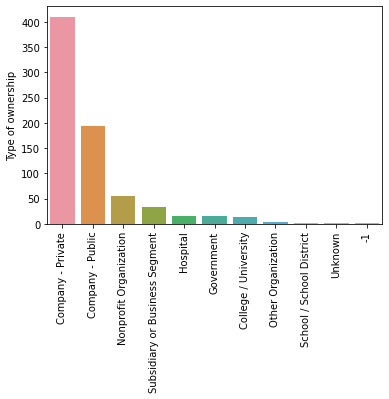

graph for Industry: total = 60


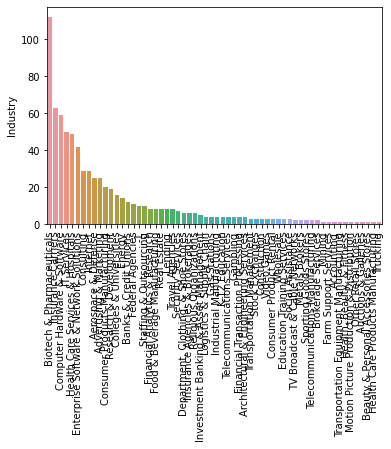

graph for Sector: total = 25


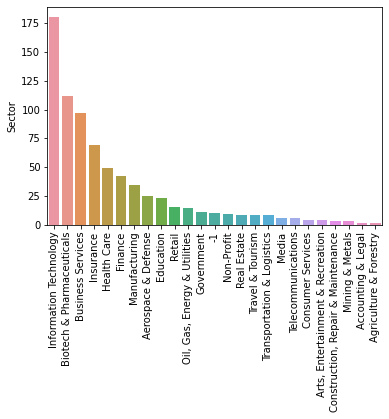

graph for Revenue: total = 14


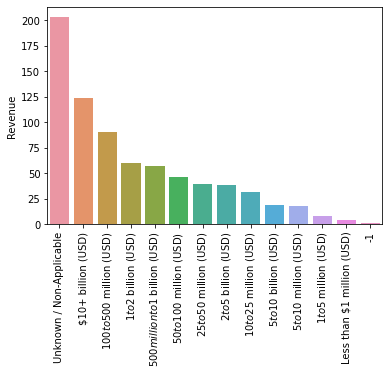

graph for company_txt: total = 343


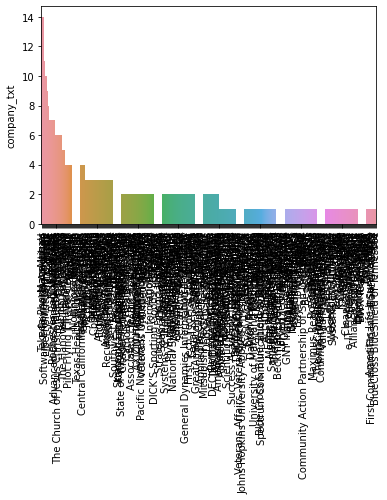

graph for job_state: total = 37


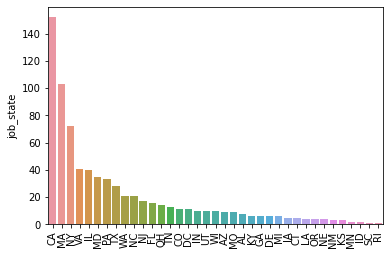

graph for same_state: total = 2


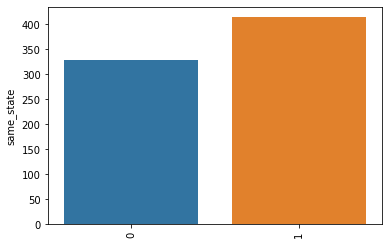

graph for python_skill: total = 2


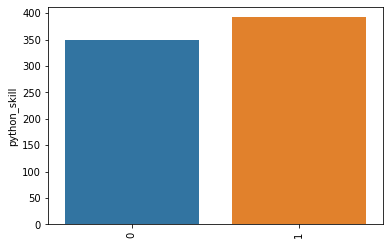

graph for sql_skill: total = 2


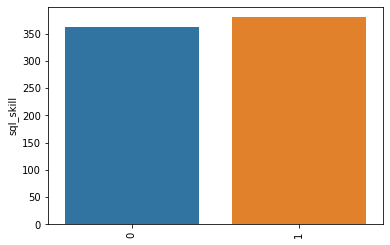

graph for R_skill: total = 2


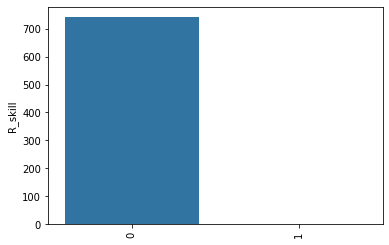

graph for spark: total = 2


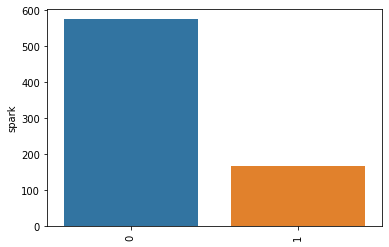

graph for aws: total = 2


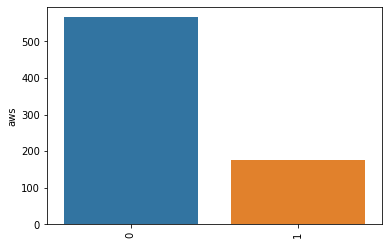

graph for excel: total = 2


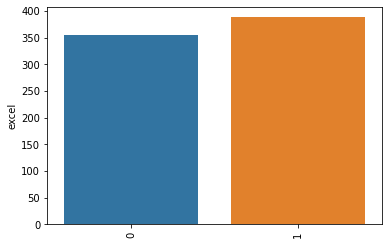

graph for job_simple: total = 7


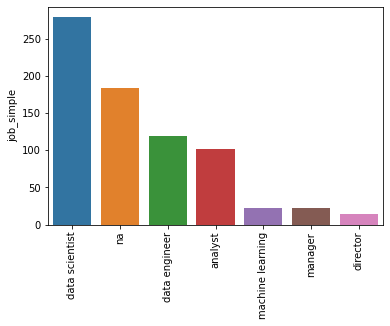

graph for seniority: total = 3


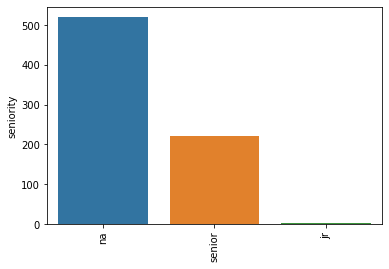

In [ ]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d" % (i,len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

graph for Location: total = 20


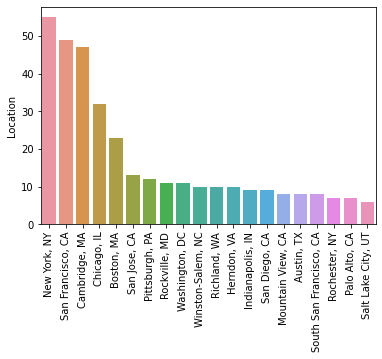

graph for Headquarters: total = 20


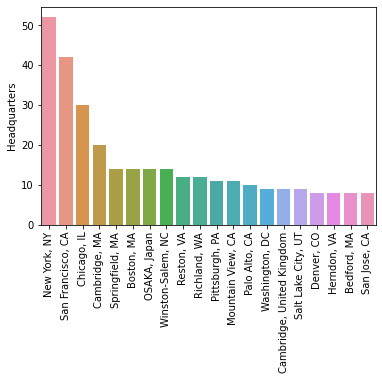

graph for company_txt: total = 20


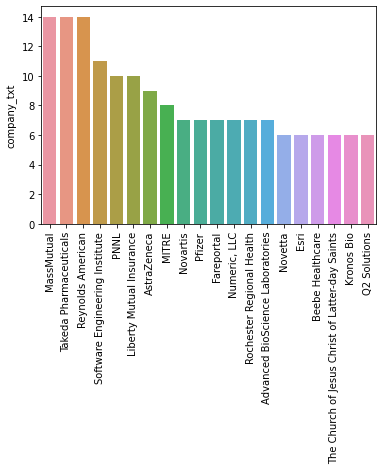

In [ ]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
df_eda.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'jd_len', 'num_competitors'],
      dtype='object')

In [ ]:
pd.pivot_table(df_eda, index = 'job_simple',values = 'avg_salary')

,avg_salary
job_simple,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [ ]:
pd.pivot_table(df_eda, index = ['job_simple','seniority'],values = 'avg_salary')

avg_salary
job_simple       seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [ ]:
pd.pivot_table(df_eda, index = ['job_state','job_simple'],values = 'avg_salary').sort_values('job_state',ascending = False)

avg_salary
job_state job_simple                
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [ ]:
pd.pivot_table(df_eda, index = ['job_state','job_simple'],values ='avg_salary',aggfunc= 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simple                  
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        machine learning           7
          data engineer              1
          data scientist             6
          analyst                    8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [ ]:
pd.pivot_table(df_eda[df_eda.job_simple=='data scientist'],index = 'job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [ ]:
df_eda.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_skill',
       'sql_skill', 'R_skill', 'spark', 'aws', 'excel', 'job_simple',
       'seniority', 'jd_len', 'num_competitors'],
      dtype='object')

In [ ]:
df_pivots = df_eda[['Rating', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'employer_provided', 'python_skill', 'R_skill', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [ ]:
for i in df_pivots.columns:
  print(i)
  print(pd.pivot_table(df_pivots,index = i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: ignored

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_skill', values = 'avg_salary', aggfunc = 'count')

python_skill,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

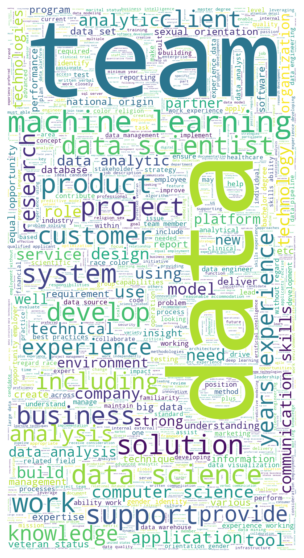

In [ ]:
words = " ".join(df_eda['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc.generate(text),interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# choose relevant columns 
df_eda.columns

df_model = df_eda[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_competitors','hourly','employer_provided',
             'job_state','same_state','age','python_skill','sql_skill','spark','aws','excel','job_simple','seniority','jd_len']]

In [ ]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [ ]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.17
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           2.19e-94
Time:                        22:21:29   Log-Likelihood:                -3310.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     598   BIC:                             7573.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.2350      6.731      6.571      0.000      31.015      57.455
Rating                                                3.5035      1.938      1.808      0.071      -0.302       7.309
num_competitors                                       2.1783      0.869      2.506      0.012       0.471       3.886
hourly                                              -37.7603      9.213     -4.099      0.000     -55.854     -19.667
employer_provided                                    29.8893     11.573      2.583      0.010       7.160      52.618
same_state                                            2.6519      2.620      1.012      0.312      -2.494       7.798
age                                                   0.0339      0.030      1.130      0.259      -0.025       0.093
python_skill                                          8.8152      2.575      3.423      0.001       3.758      13.872
sql_skill                                            -3.3276      2.549     -1.305      0.192      -8.334       1.679
spark                                                -0.2943      2.926     -0.101      0.920      -6.042       5.453
aws                                                   1.0897      2.734      0.399      0.690      -4.280       6.460
excel                                                -0.1194      2.277     -0.052      0.958      -4.591       4.352
jd_len                                               -0.0001      0.001     -0.143      0.886      -0.002       0.001
Size_-1                                              13.3839      8.626      1.552      0.121      -3.557      30.325
Size_1 to 50 employees                                1.0503      6.497      0.162      0.872     -11.710      13.810
Size_10000+ employees                                -2.8268      5.797     -0.488      0.626     -14.211       8.558
Size_1001 to 5000 employees                           6.4323      3.883      1.656      0.098      -1.195      14.059
Size_201 to 500 employees                             2.3591      3.872      0.609      0.543      -5.245       9.963
Size_5001 to 10000 employees                         -3.9850      5.439     -0.733      0.464     -14.666       6.696
Size_501 to 1000 employees                            2.4586      4.063      0.605      0.545      -5.520      10.438
Size_51 to 200 employees                              4.2364      4.419      0.959      0.338      -4.443      12.916
Size_Unknown                                         21.1263     13.985      1.511      0.131      -6.339      48.592
Type of ownership_-1                                 13.3839      8.626      1.552      0.121      -3.557      30.325
Type of ownersh

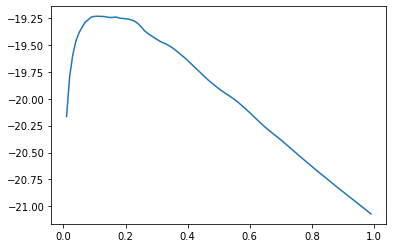

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [ ]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
10,0.11,-19.231578


In [ ]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-14.963149643644565

In [ ]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}



In [ ]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=2)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

11.128008948545864

In [ ]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 35.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
